In [1]:
%matplotlib inline
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

In [2]:
it = ['2019-01-28T21:00:00']                             #Inicio das observaçoes
itime = Time(it, format = 'isot', scale = 'utc' )

In [3]:
file = open('logfile','r')                       #Abrindo o arquivo com os dados
fwhm_HIP41296 = []
fwhm_HIP41621 = []                                 #Listas vazias para salvar os valores do fwhm

#HIP41296
for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 1
    if indice < 57 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_HIP41296.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_HIP41296.append(float(linha[39:]))
#HIP41621  
    elif indice > 57:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_HIP41621.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_HIP41621.append(float(linha[39:]))

fwhm_HIP41296 = sorted(fwhm_HIP41296)            
fwhm_HIP41621 = sorted(fwhm_HIP41621)

<h1>HIP41296</h1>

In [4]:
#imagens usadas no psfmeasure = 10,20,30,40,50,60,70,80

name_HIP41296 = 'HIP41296/HIP41296_b1x1-010_R.fit'
imagens_HIP41296 = []                                                        #Lista com o nome das imagens

for i in range(0,80,10):
    number_HIP41296 = name_HIP41296[23:26].replace(name_HIP41296[24:26],str(int(name_HIP41296[24:26])+i))
    imagens_HIP41296.append('HIP41296/HIP41296_b1x1-' + str(number_HIP41296) + '_R.fit' )

In [5]:
datas_HIP41296 = []                                                #Lista com as datas

for i in imagens_HIP41296:                                         #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                      #Extraindo o header de cada imagem
            datas_HIP41296.append(hdul[0].header['DATE-OBS'])
            
tempos_HIP41296 = Time(datas_HIP41296, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_HIP41296 = []                                                                 #Inicializando a lista com os pontos
t_HIP41296 = np.empty(len(tempos_HIP41296))                                 #Inicializando array para plotar

for i in range(len(tempos_HIP41296)):
    dt_HIP41296.append(tempos_HIP41296[i] - itime)
    t_HIP41296[i] = (dt_HIP41296[i].value)*24                               #Calculando os valores de dt em HORAS

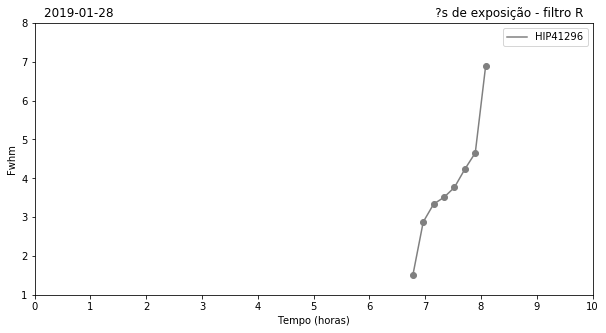

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(t_HIP41296, fwhm_HIP41296, color = 'grey')
plt.plot(t_HIP41296, fwhm_HIP41296, color = 'grey', label  ='HIP41296')
plt.yticks(np.arange(1, 9, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-28' + ' '*83 + '?s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>HIP41621</h1>

In [7]:
#imagens usadas no psfmeasure = 10,20,30,40,50,60
name_HIP41621 = 'HIP41621/HIP41621_b1x1-010_R.fit'
imagens_HIP41621 = []                                                        #Lista com o nome das imagens

for i in range(0,60,10):       
    number_HIP41621 = name_HIP41621[23:26].replace(name_HIP41621[24:26],str(int(name_HIP41621[24:26])+i))
    imagens_HIP41621.append('HIP41621/HIP41621_b1x1-' + str(number_HIP41621) + '_R.fit' )

In [8]:
datas_HIP41621 = []                                                #Lista com as datas

for i in imagens_HIP41621:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_HIP41621.append(hdul[0].header['DATE-OBS'])
            
tempos_HIP41621 = Time(datas_HIP41621, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_HIP41621 = []                                                   #Inicializando a lista com os pontos
t_HIP41621 = np.empty(len(tempos_HIP41621))                                 #Inicializando array para plotar

for i in range(len(tempos_HIP41621)):
    dt_HIP41621.append(tempos_HIP41621[i] - itime)
    t_HIP41621[i] = (dt_HIP41621[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_HIP41621 = sorted(t_HIP41621)

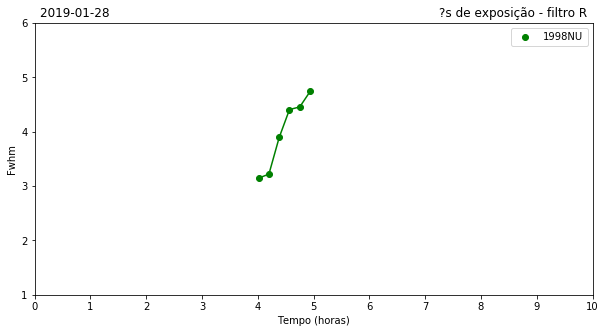

In [9]:
plt.figure(figsize=(10,5))
plt.plot(t_HIP41621, fwhm_HIP41621, color = 'green')
plt.scatter(t_HIP41621, fwhm_HIP41621, color = 'green', label='1998NU')
plt.yticks(np.arange(1, 7, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-28' + ' '*85 + '?s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

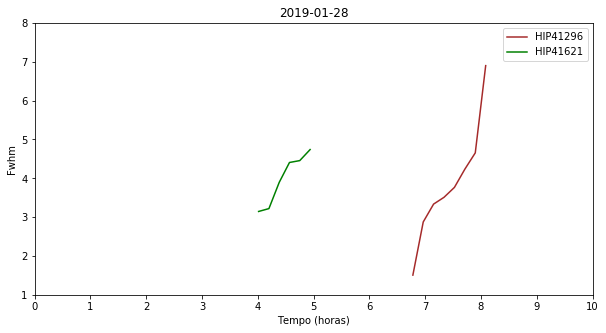

In [10]:
plt.figure(figsize=(10,5))
plt.plot(t_HIP41296, fwhm_HIP41296, color = 'brown', label = 'HIP41296')
plt.plot(t_HIP41621, fwhm_HIP41621, color = 'green', label = 'HIP41621')

plt.yticks(np.arange(1, 9, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-28')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-28_plotfwhmxtime.png')
plt.legend()
plt.show()


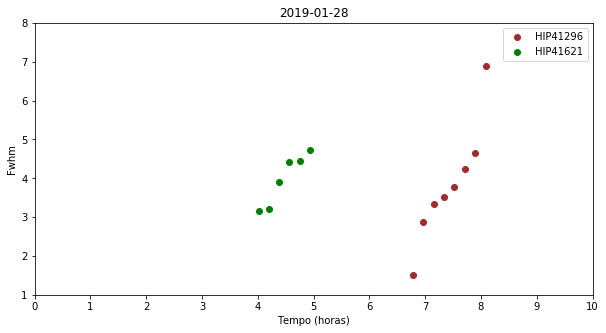

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_HIP41296, fwhm_HIP41296, color = 'brown', label = 'HIP41296')
plt.scatter(t_HIP41621, fwhm_HIP41621, color = 'green', label = 'HIP41621')

plt.yticks(np.arange(1, 9, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-28')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-28_scatterfwhmxtime.png')
plt.legend()
plt.show()


In [12]:
fwhm = fwhm_HIP41296 + fwhm_HIP41621
mean_fwhm = std.mean(fwhm)
median_fwhm = std.median(fwhm)

print(mean_fwhm)
print(median_fwhm)

3.9039928571428573
3.8311
